In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
import joblib

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('iris_kmeans.csv')

df.head()

,PetalLength,PetalWidth,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [3]:
df.shape

(90, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PetalLength  90 non-null     float64
 1   PetalWidth   90 non-null     float64
 2   Species      90 non-null     object 
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


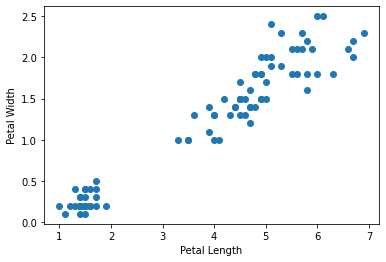

In [5]:
x = df.PetalLength
y = df.PetalWidth
plt.scatter(x,y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.savefig('petal.png')

In [6]:
df["Species"].replace({"Iris-setosa": "0", "Iris-versicolor": "1", "Iris-virginica": "2"}, inplace=True)
convert_dict = {'Species': int}
df = df.astype(convert_dict)

In [7]:
df.sample(10)

,PetalLength,PetalWidth,Species
48,4.5,1.5,1
27,1.5,0.2,0
7,1.5,0.2,0
55,4.4,1.4,1
77,6.7,2.2,2
17,1.4,0.3,0
79,5.0,1.5,2
18,1.7,0.3,0
0,1.4,0.2,0
31,4.5,1.5,1


In [8]:
df1 = df[df.Species ==0]

df2 = df[df.Species == 1]

df3 = df[df.Species == 2]

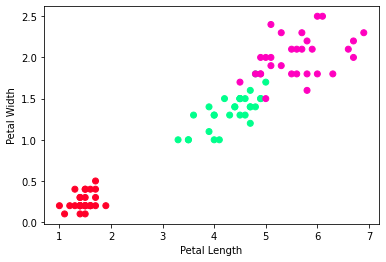

In [9]:
plt.scatter(df.PetalLength, df.PetalWidth , c=df.Species, cmap='gist_rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.savefig('petal2.png')

In [11]:
df.head()

,PetalLength,PetalWidth,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [12]:
X = df.drop('Species', axis=1)

In [13]:
X.head()

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [14]:
model = KMeans(n_clusters = 3)

model.fit(X)

KMeans(n_clusters=3)

In [15]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2])

In [16]:
X['cluster'] = y_pred
X.head()

,PetalLength,PetalWidth,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [17]:
scaler = MinMaxScaler()

scaler.fit(X[['PetalLength']])

X.Income = scaler.transform(X[['PetalLength']])

X.head()

,PetalLength,PetalWidth,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [18]:
scaler.fit(X[['PetalWidth']])

X.Age = scaler.transform(X[['PetalWidth']])

X.head()

,PetalLength,PetalWidth,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [20]:
center_x = model.cluster_centers_[:,0]
center_y = model.cluster_centers_[:,1]

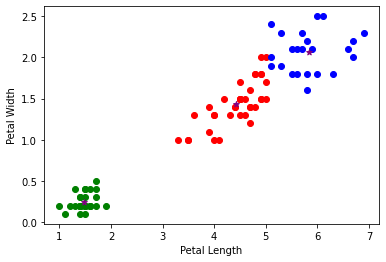

In [21]:
df4 = X[X.cluster ==0]

df5 = X[X.cluster == 1]

df6 = X[X.cluster == 2]


plt.scatter(df4.PetalLength, df4.PetalWidth, color = 'green')
plt.scatter(df5.PetalLength, df5.PetalWidth, color = 'red')
plt.scatter(df6.PetalLength, df6.PetalWidth, color = 'blue')
plt.scatter(center_x,center_y, color='purple', marker='*')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.savefig('iris2.png')

In [22]:
sse = []

for k in range(1,10):
    model = KMeans(n_clusters = k)
    model.fit(X[['PetalLength','PetalWidth']])
    sse.append(model.inertia_)

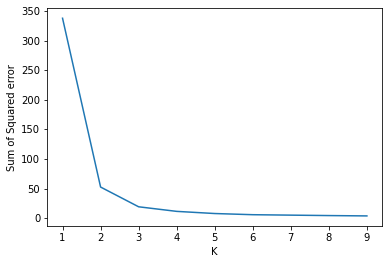

In [23]:
x = range(1,10)
y=sse

plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(x,y)
plt.savefig('k_elbow_plot.png')

In [27]:
joblib.dump(model, 'iris_classifier_kmeans.pkl')

['iris_classifier_kmeans.pkl']